In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('clean_marketing.csv')

In [4]:
df.head()

,Unnamed: 0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_date_month
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     9134 non-null   int64  
 1   customer                       9134 non-null   object 
 2   state                          9134 non-null   object 
 3   customer_lifetime_value        9134 non-null   float64
 4   response                       9134 non-null   object 
 5   coverage                       9134 non-null   object 
 6   education                      9134 non-null   object 
 7   effective_to_date              9134 non-null   object 
 8   employmentstatus               9134 non-null   object 
 9   gender                         9134 non-null   object 
 10  income                         9134 non-null   int64  
 11  location_code                  9134 non-null   object 
 12  marital_status                 9134 non-null   o

In [6]:
df.describe()

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date_month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,4566.500000,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,2636.903013,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2283.250000,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,4566.500000,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,6849.750000,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,9133.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [7]:
df_num = df.select_dtypes(include=np.number)

In [8]:
df_num

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date_month
0,0,2763.519279,56274,69,32,5,0,1,384.811147,2
1,1,6979.535903,0,94,13,42,0,8,1131.464935,1
2,2,12887.431650,48767,108,18,38,0,2,566.472247,2
3,3,7645.861827,0,106,18,65,0,7,529.881344,1
4,4,2813.692575,43836,73,12,44,0,1,138.130879,2
...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,73,18,89,0,2,198.234764,2
9130,9130,3096.511217,21604,79,14,28,0,1,379.200000,2
9131,9131,8163.890428,0,85,9,37,3,2,790.784983,2
9132,9132,7524.442436,21941,96,34,3,0,3,691.200000,2


In [9]:
df_cat = df.select_dtypes(include='object')

In [10]:
df_cat

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [11]:
df_cat = df_cat.drop(['customer'], axis=1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>],
       [<AxesSubplot:title={'center':'number_of_open_complaints'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>],
       [<AxesSubplot:title={'center':'effective_to_date_month'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

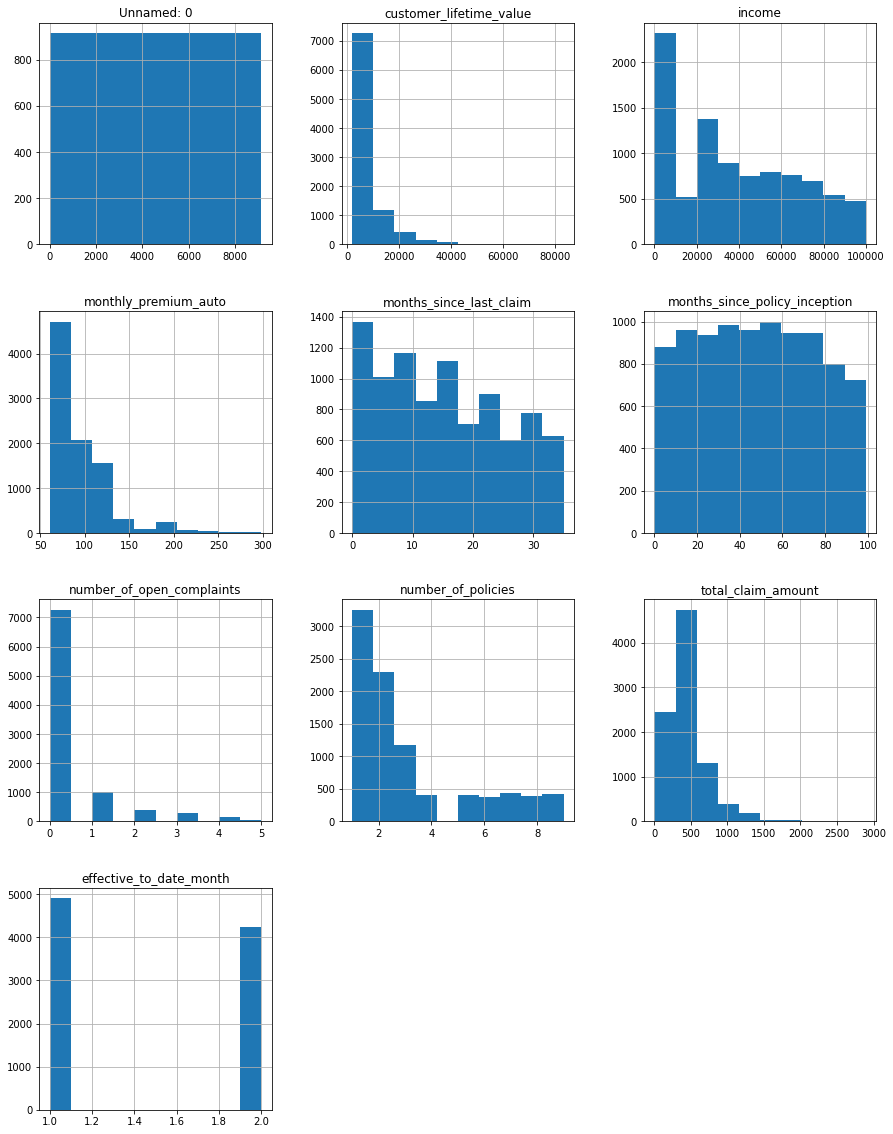

In [12]:
df_num.hist(figsize = (15,20))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='customer_lifetime_value'>

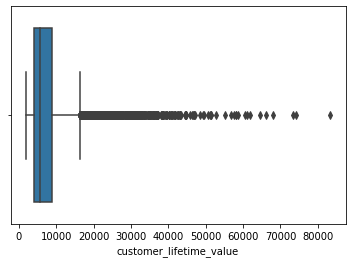

In [13]:
sns.boxplot(df['customer_lifetime_value'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='monthly_premium_auto'>

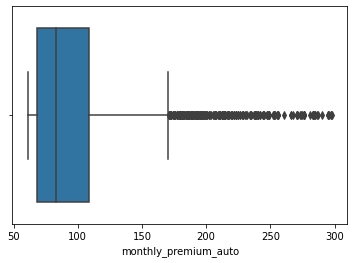

In [14]:
sns.boxplot(df['monthly_premium_auto'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_policies'>

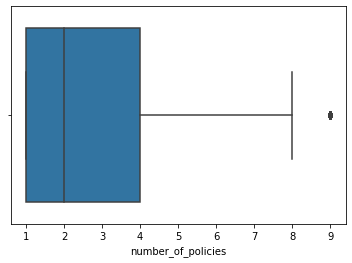

In [15]:
sns.boxplot(df['number_of_policies'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_open_complaints'>

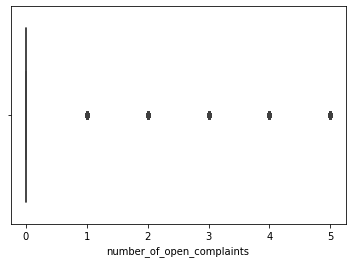

In [16]:
sns.boxplot(df['number_of_open_complaints'])

In [17]:
df_num = df_num.drop(['Unnamed: 0'], axis=1)

In [18]:
standard = StandardScaler().fit(df_num)

In [19]:
x_standard = standard.transform(df_num)

In [20]:
st_scaled = pd.DataFrame(x_standard)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>]], dtype=object)

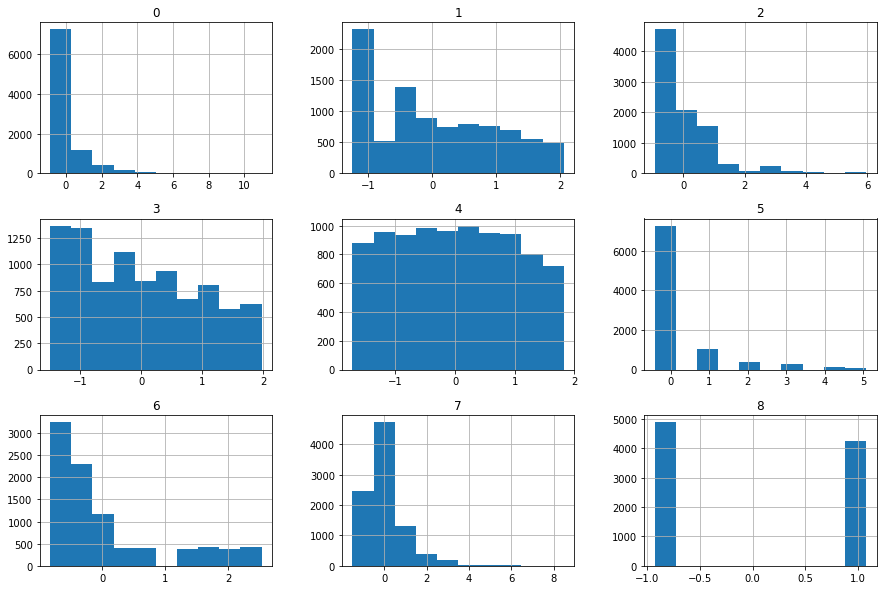

In [21]:
st_scaled.hist(figsize=(15, 10))

In [22]:
robust=RobustScaler().fit(df_num)
df_robust=robust.transform(df_num)

In [23]:
rob_scaled=pd.DataFrame(df_robust)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>]], dtype=object)

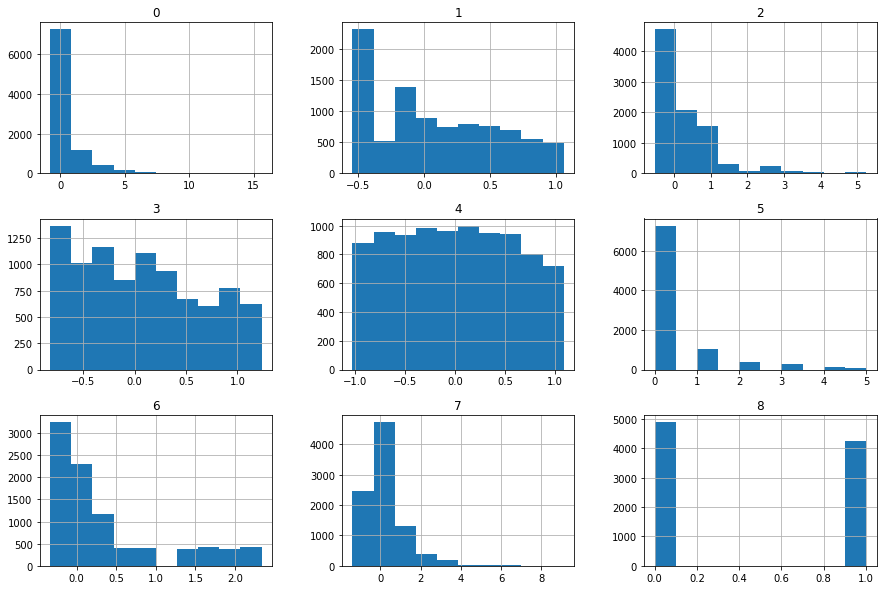

In [24]:
rob_scaled.hist(figsize=(15, 10))

In [25]:
def log_transform_clean(x):
    x=np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

<AxesSubplot:>

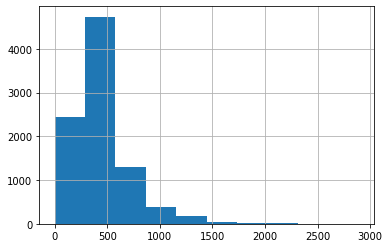

In [26]:
df_num['total_claim_amount'].hist()

In [27]:
y = df_num['total_claim_amount']
df_num = df_num.drop(['total_claim_amount'], axis=1)

<AxesSubplot:>

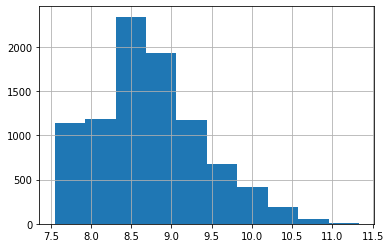

In [28]:
df_num['customer_lifetime_value']=list(map(log_transform_clean, df_num['customer_lifetime_value']))
df_num['customer_lifetime_value'].hist()

<AxesSubplot:>

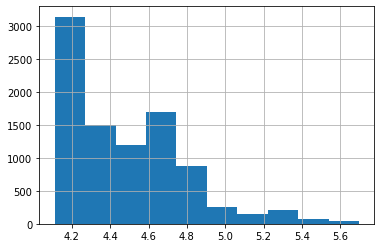

In [29]:
df_num['monthly_premium_auto'] = list(map(log_transform_clean, df_num['monthly_premium_auto']))
df_num['monthly_premium_auto'].hist()

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'effective_to_date_month'}>,
        <AxesSubplot:>]], dtype=object)

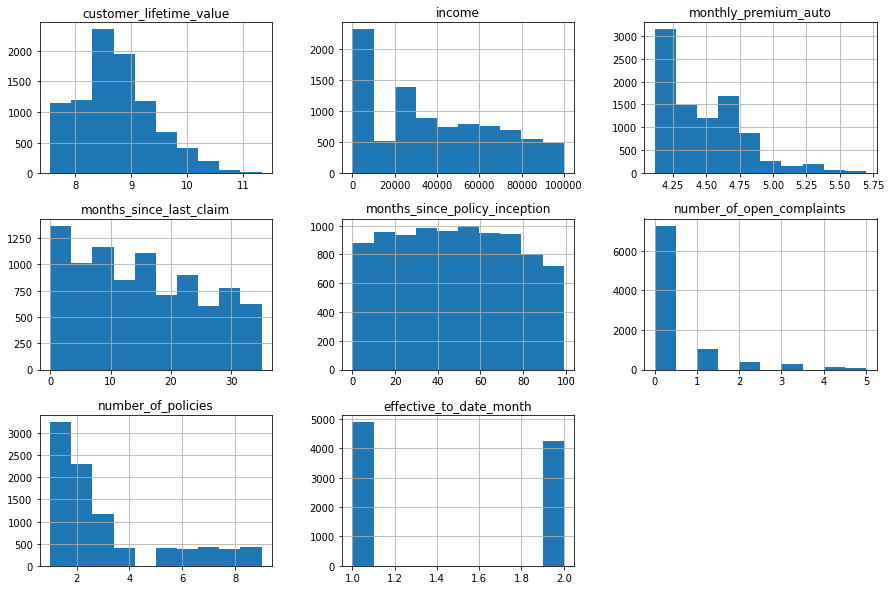

In [30]:
df_num.hist(figsize=(15, 10))

In [31]:
X_num = df_num
X_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_date_month
0,7.924260,56274,4.234107,32,5,0,1,2
1,8.850738,0,4.543295,13,42,0,8,1
2,9.464008,48767,4.682131,18,38,0,2,2
3,8.941920,0,4.663439,18,65,0,7,1
4,7.942253,43836,4.290459,12,44,0,1,2
...,...,...,...,...,...,...,...,...
9129,10.060747,71941,4.290459,18,89,0,2,2
9130,8.038031,21604,4.369448,14,28,0,1,2
9131,9.007476,0,4.442651,9,37,3,2,2
9132,8.925912,21941,4.564348,34,3,0,3,2


In [32]:
le = preprocessing.LabelEncoder()

In [33]:
df_cat = df_cat.apply(le.fit_transform)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'state'}>,
        <AxesSubplot:title={'center':'response'}>,
        <AxesSubplot:title={'center':'coverage'}>,
        <AxesSubplot:title={'center':'education'}>],
       [<AxesSubplot:title={'center':'effective_to_date'}>,
        <AxesSubplot:title={'center':'employmentstatus'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'location_code'}>],
       [<AxesSubplot:title={'center':'marital_status'}>,
        <AxesSubplot:title={'center':'policy_type'}>,
        <AxesSubplot:title={'center':'policy'}>,
        <AxesSubplot:title={'center':'renew_offer_type'}>],
       [<AxesSubplot:title={'center':'sales_channel'}>,
        <AxesSubplot:title={'center':'vehicle_class'}>,
        <AxesSubplot:title={'center':'vehicle_size'}>, <AxesSubplot:>]],
      dtype=object)

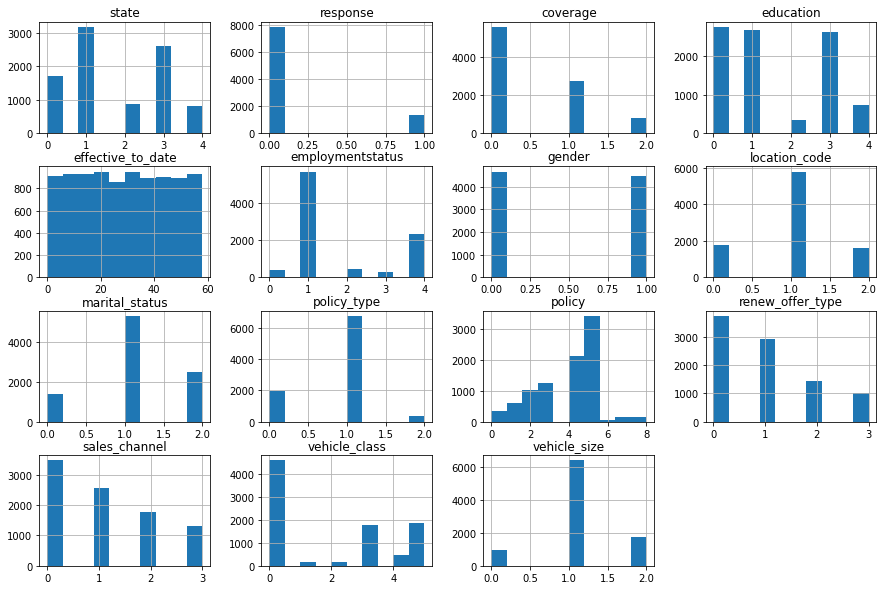

In [34]:
df_cat.hist(figsize=(15, 10))

In [48]:
minmax_ef_to_date = np.array(df['effective_to_date'])


In [36]:
X_cat = df_cat

In [37]:
X_num.shape

(9134, 8)

In [38]:
X_cat.shape

(9134, 15)

In [39]:
X = np.concatenate((X_num, X_cat), axis=1)

In [40]:
X.shape

(9134, 23)

In [41]:
y.shape

(9134,)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [43]:
lm = linear_model.LinearRegression()

In [44]:
line = lm.fit(X,y)

In [45]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train) # teach the model to find the line of best fit 
predictions = lm.predict(X_test) # run predictions based on X_test (we cannot see y_test)
r2_score(y_test, predictions) # compare y_test to predictions 

0.5721632906103785

In [46]:
mse = mean_squared_error(y_test, predictions)

In [47]:
mse

33899.99123208528